Following the rapid technological advancement, digital transactions have been increasingly prevalent in our daily lives, ranging from online purchasing to sending money overseas.

While there are obviously many benefits to do so, digital transactions have also opened door to fradulent activities, when digital monetary transactions act as an important medium for criminals to launder their money to make it appear to be coming from legal sources.

In light of these issues, the objective of this notebook is ***(1) to identify the patterns of fraudulent activities; (2) to help facilitate the learning of algorithms to identify fraudulent activities by using Machine learning models, Deep Learning-Neural Network models, Ensemble learning***. 



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import json

import csv
from random import randint
from sklearn.metrics import f1_score
import pytest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from numpy import loadtxt
import tensorflow as tf 
from numpy.random import seed
# np.random.seed(1)
# PYTHONHASHSEED=0
# tensorflow.random.set_seed(2)

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.metrics import fbeta_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
!pip install -U scikit-learn
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset description



*   step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
*   type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
amount - amount of the transaction in local currency.
*   nameOrig - customer who started the transaction
*   oldbalanceOrg - initial balance before the transaction
*   newbalanceOrig - new balance after the transaction.
*   nameDest - customer who is the recipient of the transaction
*   oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
*   newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).
*   isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
*   isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.









In [3]:
#original paysim dataset
df = pd.read_csv('https://a.pomf.cat/bgtgqf.csv', sep=',',header=0) 
print(df)

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

# Data Cleaning and Preprocessing:
Generating the primary dataset

(Chandra, 2017)

In [4]:
#Convert the DataFrame to a NumPy array for renaming and creation of derived columns 
df_2= df.to_numpy() 

In [5]:
csv_dataset_primary = [] #2nd empty list for appending

In [6]:
#indexing of columns of the new df
step = 0
trans_type = 1   #"TRANSFER" to be randomly split into "WIRE_IN" (50%) and "WIRE_OUT" (50%)
amount = 2
nameOrig = 3
oldbalanceOrg = 4
nameDest = 5
oldbalanceDest = 6
accountType = 7  #Create a new dervied column called "accountType" by whenever the “trans_type's value==transfer”,
                  #append it as “foreign”, or else we append it as “domestic” 
isFraud = 8
isFlaggedFraud = 9

In [7]:
#df transformation
#Corresponding to the above column index assignment, perform the df transformation by df_index_appending
##df_2[i, 0] #i is the iterator, and 0 is the index of the column; #on the first column, i is getting all the value 

transfer = ["WIRE_IN", "WIRE_OUT"]
for i in range(df_2.shape[0]): #df.shape[0]=the_row 
	arr = [] #1st empty list for appending
	arr.append(df_2[i,step])
	if df_2[i,trans_type] =="PAYMENT": #Renaming the column content
		arr.append("CREDIT")
	elif df_2[i,trans_type] =="TRANSFER":
		arr.append(transfer[randint(0,1)]) #random no. between 0 and 1 (Randomly Splitting df_2.col value into wire_in (50%), wire_out (50%))
	else:
		arr.append(df_2[i,trans_type])
	arr.append(df_2[i,amount])
	arr.append(df_2[i,nameOrig])
	arr.append(df_2[i,oldbalanceOrg])
	arr.append(df_2[i,nameDest])
	arr.append(df_2[i,oldbalanceDest])
	if df_2[i,trans_type] == "TRANSFER": #Create a new dervied column called "accountType" by whenever the “trans_type's value==transfer”
		arr.append("FOREIGN")              #we append it as “foreign”, else we append it as “domestic” 
	else:
		arr.append("DOMESTIC")         

	arr.append(df_2[i,isFraud])
	arr.append(df_2[i,isFlaggedFraud])

	csv_dataset_primary.append(arr)   #making a new df called "csv_dataset_primary"

# Exploratory Data Analysis: The primary dataset

In [8]:
# Plotting the pie chart for above dataframe
import pandas as pd
import matplotlib.pyplot as plt


data_path = "https://a.pomf.cat/jnwgdf.xlsx" #dataset_primary

# Read and store content
# of an excel file 
read_file = pd.read_excel ("https://a.pomf.cat/jnwgdf.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("dataset_primary.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df_2e = pd.DataFrame(pd.read_csv("dataset_primary.csv"))
  
# show the dataframe
df_2e

#Create an index column for plotting the bar chart and the pie chart using groupby
df_2e["index"]=df_2e.index
df_2e


,step,trans_type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,accountType,isFraud,isFlaggedFraud,index
0,1,CREDIT,9839.64,C1231006815,170136.00,M1979787155,0.00,DOMESTIC,0,0,0
1,1,WIRE_OUT,181.00,C1305486145,181.00,C553264065,0.00,FOREIGN,1,0,1
2,1,CREDIT,11668.14,C2048537720,41554.00,M1230701703,0.00,DOMESTIC,0,0,2
3,1,CREDIT,7107.77,C154988899,183195.00,M408069119,0.00,DOMESTIC,0,0,3
4,1,CREDIT,4024.36,C1265012928,2671.00,M1176932104,0.00,DOMESTIC,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
524283,95,CREDIT,12598.15,C565523855,30601.00,M1740980642,0.00,DOMESTIC,0,0,524283
524284,95,CREDIT,20721.54,C954269986,49732.00,M812667644,0.00,DOMESTIC,0,0,524284
524285,95,CASH_OUT,132557.35,C1179511630,479803.00,C435674507,484329.37,DOMESTIC,0,0,524285
524286,95,CREDIT,14140.05,C2037964975,20545.00,M1355182933,0.00,DOMESTIC,0,0,524286


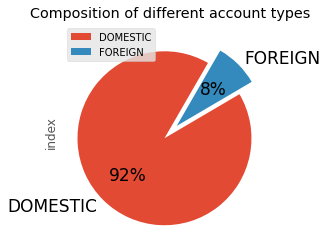

In [9]:
explode_2 = (0.1, 0.1)

df_2e.groupby(['accountType']).sum().plot(kind='pie', y="index", autopct='%1.0f%%',explode=explode_2, fontsize=17, startangle=60, 
                                  title='Composition of different account types')

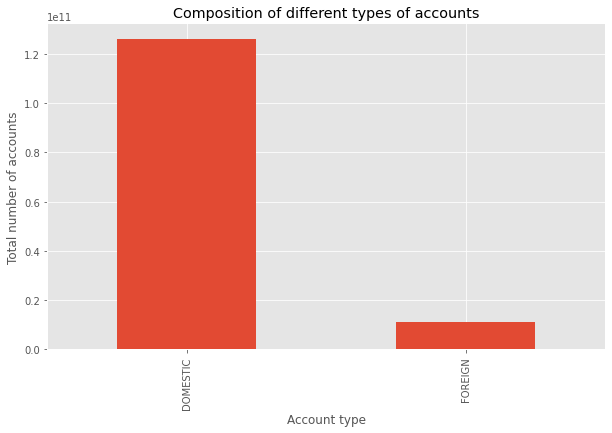

In [10]:
#calculate sum of values by types of accounts
df_2e_groups = df_2e.groupby(['accountType'])['index'].sum()

#create bar plot by group
df_2e_groups.plot(kind='bar',title='Composition of different types of accounts',
               ylabel='Total number of accounts', xlabel='Account type', figsize=(10, 6))

The above bar chart and pie chart show that in this dataset, the number of domestic accounts far outnumbers that of foreign accounts, amounting to 92% and 8% of the total number of accounts respectively. 

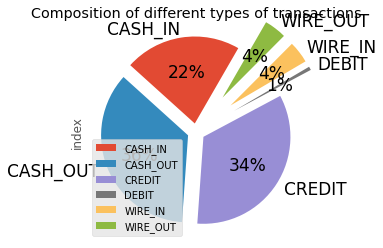

In [11]:
explode = (0.1, 0.1, 0.1, 0.5, 0.5, 0.5)

df_2e.groupby(['trans_type']).sum().plot(kind='pie', y="index", autopct='%1.0f%%',explode=explode, fontsize=17, startangle=60, 
                                  title='Composition of different types of transactions')

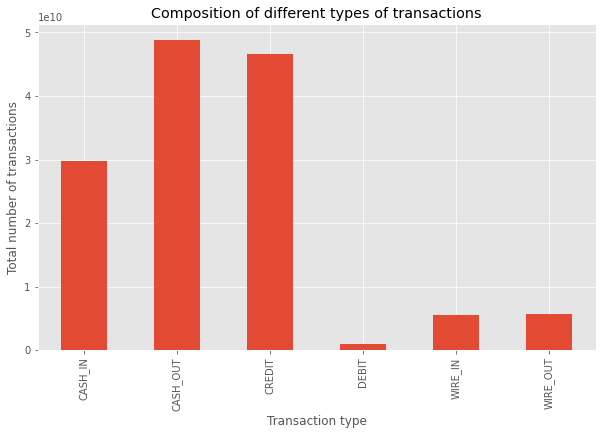

In [12]:
#calculate sum of values by types of transaction
df_2e_groups = df_2e.groupby(['trans_type'])['index'].sum()

#create bar plot by group
df_2e_groups.plot(kind='bar',title='Composition of different types of transactions',
               ylabel='Total number of transactions', xlabel='Transaction type', figsize=(10, 6))

The above bar chart and pie chart show that in this dataset, the vast majority (over 90%) of the transactions is conducted in among domestic accounts by various means ranging from cash withdrawal, crediting to cash deposit; whereas foreign accounts only constitute nothing more than 8% of the total number of transactions, all of which are, once again, in line with the first inference above.

Pivot table analysis: The primary dataset

In [13]:
paysim_pivot1=pd.pivot_table(data=df_2e,index=["trans_type"],
                             values=['amount','isFraud','isFlaggedFraud'], aggfunc=[np.sum], margins=True)

#Adding color gradient 
cm = sns.light_palette("yellow", as_cmap=True)
paysim_pivot1.style.background_gradient(cmap=cm)

The above pivot table shows that there are several serious concerns in the dataset. In the first place, while there have been, in the case of "CASH_OUT", 410 actual fraudulent transanctions, there have been no any flagged fraudulent transactions. Furthermore, similar issues are also found in the case of "WIRE_IN" and "WIRE_OUT". While there have been 85 and 71 counts of fraudulent transactions respectively in reality, none of those has been flagged.

As a result, it is crucial to minimize the risk of unblocked/unnoticed fraudulent transactions by developing an efficeint algorithm.

In [14]:
paysim_pivot2=pd.pivot_table(data=df_2e,index=["accountType"],
                             values=['amount','isFraud','isFlaggedFraud'], aggfunc=[np.sum], margins=True)

#Adding color gradient 
cm = sns.light_palette("orange", as_cmap=True)
paysim_pivot2.style.background_gradient(cmap=cm)

The above pivot table reveals an interesting fact that contrary to the popular belief of fraudulent transactions/money laundering involving the heavy use of offshore banking, the vast majority of fraud by monetary amount and by counts are found in domestic rather than foreign accounts, all of which are ,once again, consistent with the inferences above. 

However, it is important to note that the number of domestic accounts has already outnumbered the number of foreign accounts in the original dataset. 

# Data Cleaning and Preprocessing:
Generating the secondary dataset

(Chandra, 2017)

In [15]:
data_path = "https://a.pomf.cat/jnwgdf.xlsx" #dataset_primary

# Read and store content
# of an excel file 
read_file = pd.read_excel ("https://a.pomf.cat/jnwgdf.xlsx")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("dataset_primary.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
X = pd.DataFrame(pd.read_csv("dataset_primary.csv"))
  
# show the dataframe
X


,step,trans_type,amount,nameOrig,oldbalanceOrg,nameDest,oldbalanceDest,accountType,isFraud,isFlaggedFraud
0,1,CREDIT,9839.64,C1231006815,170136.00,M1979787155,0.00,DOMESTIC,0,0
1,1,WIRE_OUT,181.00,C1305486145,181.00,C553264065,0.00,FOREIGN,1,0
2,1,CREDIT,11668.14,C2048537720,41554.00,M1230701703,0.00,DOMESTIC,0,0
3,1,CREDIT,7107.77,C154988899,183195.00,M408069119,0.00,DOMESTIC,0,0
4,1,CREDIT,4024.36,C1265012928,2671.00,M1176932104,0.00,DOMESTIC,0,0
...,...,...,...,...,...,...,...,...,...,...
524283,95,CREDIT,12598.15,C565523855,30601.00,M1740980642,0.00,DOMESTIC,0,0
524284,95,CREDIT,20721.54,C954269986,49732.00,M812667644,0.00,DOMESTIC,0,0
524285,95,CASH_OUT,132557.35,C1179511630,479803.00,C435674507,484329.37,DOMESTIC,0,0
524286,95,CREDIT,14140.05,C2037964975,20545.00,M1355182933,0.00,DOMESTIC,0,0


In [16]:
print("Reading dataset")
X = pd.read_csv("dataset_primary.csv", sep=",",header=0)
X = X.values
print("Read dataset")

Reading dataset
Read dataset


In [17]:
#col
step = 0
trans_type = 1
amount = 2
nameOrig = 3
oldbalanceOrg = 4
nameDest = 5
oldbalanceDest = 6
accountType = 7
isFraud = 8

In [18]:
#col
entity = 0
incommingDomestic30 = 1
incommingDomestic60 = 2
incommingDomestic90 = 3
outgoingDomestic30 = 4
outgoingDomestic60 = 5
outgoingDomestic90 = 6
incommingForeign30 = 7
incommingForeign60 = 8
incommingForeign90 = 9
outgoingForeign30 = 10
outgoingForeign60 = 11
outgoingForeign90 = 12
incoming_domestic_count_30 = 13
incoming_domestic_count_60 = 14
incoming_domestic_count_90 = 15
outgoing_domestic_count_30 = 16
outgoing_domestic_count_60 = 17
outgoing_domestic_count_90 = 18
incoming_foreign_count_30 = 19
incoming_foreign_count_60 = 20
incoming_foreign_count_90 = 21
outgoing_foreign_count_30 = 22
outgoing_foreign_count_60 = 23
outgoing_foreign_count_90 = 24
balance_difference_30 = 25
balance_difference_60 = 26
balance_difference_90 = 27
isFraudSec = 28
# step = 29

In [19]:
csv_dataset_secondary = []
entities_pos = {}
enititesDict = {}

In [20]:
def getSecRow(entity): #entity is the first value, appending new rows where the first row is "entity", the rest of the value is 0 (random value)
	return [entity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [21]:
X

array([[1, 'CREDIT', 9839.64, ..., 'DOMESTIC', 0, 0],
       [1, 'WIRE_OUT', 181.0, ..., 'FOREIGN', 1, 0],
       [1, 'CREDIT', 11668.14, ..., 'DOMESTIC', 0, 0],
       ...,
       [95, 'CASH_OUT', 132557.35, ..., 'DOMESTIC', 0, 0],
       [95, 'CREDIT', 14140.05, ..., 'DOMESTIC', 0, 0],
       [95, 'CREDIT', 11450.03, ..., 'DOMESTIC', 0, 0]], dtype=object)

In [22]:
#for rows ,get it from the first index which is zero;df.shape[0]
for i in range(X.shape[0]):#If X has n rows and m columns, then X.shape is (n,m). So X.shape[0] is n row
	source_entity = X[i,nameOrig]
	dest_entity = X[i,nameDest]

	source_pos = entities_pos.get(source_entity,-1) #get the value of the dict key: "source_entity", return the default value "-1" if the entity is not found in the dict
	if source_pos == -1: #If the default vaue (-1) applies,
		#entities_pos[source_entity] =same as "entities_pos.get(source_entity,-1)". If the "entity" is not found, it will return error
		entities_pos[source_entity] = len(csv_dataset_secondary) 
		# source_pos = pos                                    ### entities_pos[source_entity] = len(csv_dataset_secondary) is getting something with source_entity being the key
		source_pos = len(csv_dataset_secondary)               ## https://stackoverflow.com/questions/651794/whats-the-best-way-to-initialize-a-dict-of-dicts-in-python
	
		row = getSecRow(source_entity) 

		csv_dataset_secondary.append(row) 


	dest_pos = entities_pos.get(dest_entity,-1)
	if dest_pos == -1:
		# entities_pos[dest_entity] = pos #whenever “pos” appears, we will use “len(csv_dataset_secondary)” cuz “pos” is not doing anything
		entities_pos[dest_entity] = len(csv_dataset_secondary)
		# dest_pos = pos #whenever “pos” appears, we will use “len(csv_dataset_secondary)” cuz “pos” is not doing anything
		dest_pos = len(csv_dataset_secondary)

		row = getSecRow(dest_entity)
		
		csv_dataset_secondary.append(row)

	transferAmountSource = 0
	transferAmountDest = 0

#Creating new columns of "transaction amount" based on different row conditions and values of the "trans_type", and the timesteps 
#using empty "csv_dataset_secondary" as the "dictionary name"
	if X[i,trans_type] == "CASH_IN" or X[i,trans_type] == "CREDIT":
		if X[i,step] <=30: 
			csv_dataset_secondary[source_pos][incommingDomestic30] += X[i,amount] #nested dictionary, each time the source_pos would be different cuz it is in the loop 
			csv_dataset_secondary[dest_pos][outgoingDomestic30] += X[i,amount] #"csv_dataset_secondary" is the "dictionary name" cuz it is before the []; [source_pos][incommingDomestic30] are "the dict.keys"
		if X[i,step] <=60:
			csv_dataset_secondary[source_pos][incommingDomestic60] += X[i,amount]
			csv_dataset_secondary[dest_pos][outgoingDomestic60] += X[i,amount]
		if X[i,step] <=90:
			csv_dataset_secondary[source_pos][incommingDomestic90] += X[i,amount] 
			csv_dataset_secondary[dest_pos][outgoingDomestic90] += X[i,amount]

		transferAmountSource = X[i,amount] #the source is getting the money 
		transferAmountDest = -1*X[i,amount] # X[i,amount] has to be multiplifed with -1 #giving out the money #dun look at the variable name 

	if X[i,trans_type] == "CASH_OUT" or X[i,trans_type] == "DEBIT":
		if X[i,step] <=30:
			csv_dataset_secondary[source_pos][outgoingDomestic30] += X[i,amount]
			csv_dataset_secondary[dest_pos][incommingDomestic30] += X[i,amount]
		if X[i,step] <=60:
			csv_dataset_secondary[source_pos][outgoingDomestic60] += X[i,amount]
			csv_dataset_secondary[dest_pos][incommingDomestic60] += X[i,amount]
		if X[i,step] <=90:
			csv_dataset_secondary[source_pos][outgoingDomestic90] += X[i,amount] 
			csv_dataset_secondary[dest_pos][incommingDomestic90] += X[i,amount]

		transferAmountSource = -1*X[i,amount] #the source is giving out the money
		transferAmountDest = X[i,amount] #getting the money

	if X[i,trans_type] == "WIRE_IN":
		if X[i,step] <=30:
			csv_dataset_secondary[source_pos][incommingForeign30] += X[i,amount]
			csv_dataset_secondary[dest_pos][outgoingForeign30] += X[i,amount]
		if X[i,step] <=60:
			csv_dataset_secondary[source_pos][incommingForeign60] += X[i,amount]
			csv_dataset_secondary[dest_pos][outgoingForeign60] += X[i,amount]
		if X[i,step] <=90:
			csv_dataset_secondary[source_pos][incommingForeign90] += X[i,amount] 
			# print(dest_pos,outgoingForeign90,i,amount)
			csv_dataset_secondary[dest_pos][outgoingForeign90] += X[i,amount]

		transferAmountSource = X[i,amount]
		transferAmountDest = -1*X[i,amount]

	if X[i,trans_type] == "WIRE_OUT":
		if X[i,step] <=30:
			csv_dataset_secondary[source_pos][outgoingForeign30] += X[i,amount]
			csv_dataset_secondary[dest_pos][incommingForeign30] += X[i,amount]
		if X[i,step] <=60:
			csv_dataset_secondary[source_pos][outgoingForeign60] += X[i,amount]
			csv_dataset_secondary[dest_pos][incommingForeign60] += X[i,amount]
		if X[i,step] <=90:
			csv_dataset_secondary[source_pos][outgoingForeign90] += X[i,amount] 
			csv_dataset_secondary[dest_pos][incommingForeign90] += X[i,amount]

		transferAmountSource = -1*X[i,amount]
		transferAmountDest = X[i,amount]
  #enititesDict[source_entity] =enititesDict.get(source_entity,-1)
	#enititesDict instead of csv_dataset_secondary #enititesDict is the default dictionary, with everything = 0, to avoid confusion during the transport process to the final dictionary "csv_dataset_secondary" 
	#print(source_entity) #source_entity is the original ID
	#print(source_pos) #source_pos is the position/index of the ID
	# -1 is just a default value when the dict value of "source_entity" does not exist 
	#enititesDict.get(source_entity,-1) == -1, so no further development in the newly created columns yet
	if enititesDict.get(source_entity,-1) == -1:      
		enititesDict[source_entity] = {                 
										'day1Bal': X[i,oldbalanceOrg],
										'day30Bal': 0,
										'day60Bal': 0,
										'day90Bal': 0,
										'countIncomingDomestic30': 0,
										'countOutgoingDomestic30': 0,
										'countIncomingDomestic60': 0,
										'countOutgoingDomestic60': 0,
										'countIncomingDomestic90': 0,
										'countOutgoingDomestic90': 0,
										'countIncomingForeign30': 0,
										'countOutgoingForeign30': 0,
										'countIncomingForeign60': 0,
										'countOutgoingForeign60': 0,
										'countIncomingForeign90': 0,
										'countOutgoingForeign90': 0
										}
  #enititesDict[dest_entity] =enititesDict.get(dest_entity,-1)
	#-1 is just a default value when the dict value of "source_entity" does not exist
	#enititesDict.get(dest_entity,-1) == -1, so no further development in the newly created columns yet
	if enititesDict.get(dest_entity,-1) == -1:  
		enititesDict[dest_entity] = {             
										'day1Bal': X[i,oldbalanceDest], 
										'day30Bal': 0,
										'day60Bal': 0,
										'day90Bal': 0,
										'countIncomingDomestic30': 0,
										'countOutgoingDomestic30': 0,
										'countIncomingDomestic60': 0,
										'countOutgoingDomestic60': 0,
										'countIncomingDomestic90': 0,
										'countOutgoingDomestic90': 0,
										'countIncomingForeign30': 0,
										'countOutgoingForeign30': 0,
										'countIncomingForeign60': 0,
										'countOutgoingForeign60': 0,
										'countIncomingForeign90': 0,
										'countOutgoingForeign90': 0
									}

	incomingForSource = ["CASH_IN","CREDIT","WIRE_IN"]
	incomingForDest = ["CASH_OUT","DEBIT","WIRE_OUT"]
	outgoingForDest = incomingForSource
	outgoingForSource = incomingForDest

#Creating new columns of "transaction counts" based on different row conditions and values of the "accountType", and the timesteps
#enititesDict instead of csv_dataset_secondary #enititesDict is the default dictionary, with everything = 0, to avoid confusion during the transport process to the final dictionary "csv_dataset_secondary" 
#source_entity is the original ID
#source_pos is the position/index of the ID
	if X[i,step]<=30: 
		enititesDict[source_entity]['day30Bal'] = transferAmountSource+X[i,oldbalanceOrg]  #no need to assign "+/-" to transferAmountSource as a caculated answer
		enititesDict[dest_entity]['day30Bal'] = transferAmountDest+X[i,oldbalanceDest]
		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForSource:
				enititesDict[source_entity]['countIncomingForeign30'] += 1 # "source_entity" is used due to "incomingForSource"; "+=1" due to "count"
			else:
				enititesDict[source_entity]['countOutgoingForeign30'] += 1 #transaction count
		else:                  #for domestic 
			if X[i,trans_type] in incomingForDest:
				enititesDict[source_entity]['countIncomingDomestic30'] += 1
			else:
				enititesDict[source_entity]['countOutgoingDomestic30'] += 1


		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingForeign30'] += 1 # "dest_entity" is used due to "incomingForDest"
			else:

				enititesDict[dest_entity]['countOutgoingForeign30'] += 1
		else:                  #for domestic 
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingDomestic30'] += 1
			else:
				enititesDict[dest_entity]['countOutgoingDomestic30'] += 1

	if X[i,step]<=60:
		enititesDict[source_entity]['day60Bal'] = transferAmountSource+X[i,oldbalanceOrg]
		enititesDict[dest_entity]['day60Bal'] = transferAmountDest+X[i,oldbalanceDest]
		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForSource:
				enititesDict[source_entity]['countIncomingForeign60'] += 1
			else:
				enititesDict[source_entity]['countOutgoingForeign60'] += 1
		else:
			if X[i,trans_type] in incomingForDest:
				enititesDict[source_entity]['countIncomingDomestic60'] += 1
			else:
				enititesDict[source_entity]['countOutgoingDomestic60'] += 1

		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingForeign60'] += 1
			else:
				enititesDict[dest_entity]['countOutgoingForeign60'] += 1
		else:
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingDomestic60'] += 1
			else:
				enititesDict[dest_entity]['countOutgoingDomestic60'] += 1

	if X[i,step]<=90:
		enititesDict[source_entity]['day90Bal'] = transferAmountSource+X[i,oldbalanceOrg]
		enititesDict[dest_entity]['day90Bal'] = transferAmountDest+X[i,oldbalanceDest]
		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForSource:
				enititesDict[source_entity]['countIncomingForeign90'] += 1
			else: 
				enititesDict[source_entity]['countOutgoingForeign90'] += 1
		else:
			if X[i,trans_type] in incomingForDest:
				enititesDict[source_entity]['countIncomingDomestic90'] += 1
			else:
				enititesDict[source_entity]['countOutgoingDomestic90'] += 1

		if X[i,accountType] == "FOREIGN":
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingForeign90'] += 1
			else:
				enititesDict[dest_entity]['countOutgoingForeign90'] += 1
		else:
			if X[i,trans_type] in incomingForDest:
				enititesDict[dest_entity]['countIncomingDomestic90'] += 1
			else:
				enititesDict[dest_entity]['countOutgoingDomestic90'] += 1

#Make the columns of balance differences by subtracting 
#then why switching back to the use of csv_dataset_secondary[source_pos] instead of enititesDict[source_entity]
#entitiesdict is just another dictionary for transportation, for clear understanding to avoid confusion
#csv_dataset_secondary is the final dictionary
#whenever it has "csv_dataset_secondary", it will always have "source_pos"
#whenever it has "enititesDict", it will always have "source_entity"
	csv_dataset_secondary[source_pos][balance_difference_30] = enititesDict[source_entity]['day30Bal'] - enititesDict[source_entity]['day1Bal']
	csv_dataset_secondary[source_pos][balance_difference_60] = enititesDict[source_entity]['day60Bal'] - enititesDict[source_entity]['day1Bal']
	csv_dataset_secondary[source_pos][balance_difference_90] = enititesDict[source_entity]['day90Bal'] - enititesDict[source_entity]['day1Bal'] 


#Make columns of transaction count; 
#then why switching back to the use of csv_dataset_secondary[source_pos] instead of enititesDict[source_entity]
#entitiesdict is just another dictionary for transportation, for clear understanding to avoid confusion
#csv_dataset_secondary is the final dictionary
	csv_dataset_secondary[source_pos][incoming_domestic_count_30] = enititesDict[source_entity]['countIncomingDomestic30']
	csv_dataset_secondary[source_pos][outgoing_domestic_count_30] = enititesDict[source_entity]['countOutgoingDomestic30']
	csv_dataset_secondary[source_pos][incoming_domestic_count_60] = enititesDict[source_entity]['countIncomingDomestic60']
	csv_dataset_secondary[source_pos][outgoing_domestic_count_60] = enititesDict[source_entity]['countOutgoingDomestic60']
	csv_dataset_secondary[source_pos][incoming_domestic_count_90] = enititesDict[source_entity]['countIncomingDomestic90']
	csv_dataset_secondary[source_pos][outgoing_domestic_count_90] = enititesDict[source_entity]['countOutgoingDomestic90'] 
	csv_dataset_secondary[source_pos][incoming_foreign_count_30] = enititesDict[source_entity]['countIncomingForeign30']
	csv_dataset_secondary[source_pos][outgoing_foreign_count_30] = enititesDict[source_entity]['countOutgoingForeign30']
	csv_dataset_secondary[source_pos][incoming_foreign_count_60] = enititesDict[source_entity]['countIncomingForeign60']
	csv_dataset_secondary[source_pos][outgoing_foreign_count_60] = enititesDict[source_entity]['countOutgoingForeign60']
	csv_dataset_secondary[source_pos][incoming_foreign_count_90] = enititesDict[source_entity]['countIncomingForeign90']
	csv_dataset_secondary[source_pos][outgoing_foreign_count_90] = enititesDict[source_entity]['countOutgoingForeign90'] 

#creating the fraud variable
#source_pos :the person sending the money; dest_pos= the person getting money; 
#source_pos is used instead of dest_pos :it is the person who is doing fraud as the source of concern who is sending the money; but not the person receiving the money (destination)
	csv_dataset_secondary[source_pos][isFraudSec] = csv_dataset_secondary[source_pos][isFraudSec] or X[i,isFraud] 

	csv_dataset_secondary[dest_pos][incoming_domestic_count_30] = enititesDict[dest_entity]['countIncomingDomestic30']
	csv_dataset_secondary[dest_pos][outgoing_domestic_count_30] = enititesDict[dest_entity]['countOutgoingDomestic30']
	csv_dataset_secondary[dest_pos][incoming_domestic_count_60] = enititesDict[dest_entity]['countIncomingDomestic60']
	csv_dataset_secondary[dest_pos][outgoing_domestic_count_60] = enititesDict[dest_entity]['countOutgoingDomestic60']
	csv_dataset_secondary[dest_pos][incoming_domestic_count_90] = enititesDict[dest_entity]['countIncomingDomestic90']
	csv_dataset_secondary[dest_pos][outgoing_domestic_count_90] = enititesDict[dest_entity]['countOutgoingDomestic90'] 
	csv_dataset_secondary[dest_pos][incoming_foreign_count_30] = enititesDict[dest_entity]['countIncomingForeign30']
	csv_dataset_secondary[dest_pos][outgoing_foreign_count_30] = enititesDict[dest_entity]['countOutgoingForeign30']
	csv_dataset_secondary[dest_pos][incoming_foreign_count_60] = enititesDict[dest_entity]['countIncomingForeign60']
	csv_dataset_secondary[dest_pos][outgoing_foreign_count_60] = enititesDict[dest_entity]['countOutgoingForeign60']
	csv_dataset_secondary[dest_pos][incoming_foreign_count_90] = enititesDict[dest_entity]['countIncomingForeign90']
	csv_dataset_secondary[dest_pos][outgoing_foreign_count_90] = enititesDict[dest_entity]['countOutgoingForeign90'] 



In [ ]:
read_file = pd.read_excel('https://a.pomf.cat/zriikt.xlsx') #dataset after data cleaning 

# Write the dataframe object
# into csv file
read_file.to_csv ("dataset_secondary.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df_4 = pd.DataFrame(pd.read_csv("dataset_secondary.csv"))
  
# show the dataframe
df_4

,entity,incoming_domestic_amount_30,incoming_domestic_amount_60,incoming_domestic_amount_90,outgoing_domestic_amount_30,outgoing_domestic_amount_60,outgoing_domestic_amount_90,incoming_foreign_amount_30,incoming_foreign_amount_60,incoming_foreign_amount_90,...,incoming_foreign_count_30,incoming_foreign_count_60,incoming_foreign_count_90,outgoing_foreign_count_30,outgoing_foreign_count_60,outgoing_foreign_count_90,balance_difference_30,balance_difference_60,balance_difference_90,isFraud
0,C1231006815,9839.64,9839.64,9839.64,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,9839.64,9839.64,9839.64,0
1,C2048537720,11668.14,11668.14,11668.14,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,11668.14,11668.14,11668.14,0
2,C1265012928,4024.36,4024.36,4024.36,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,4024.36,4024.36,4024.36,0
3,C1648232591,2560.74,2560.74,2560.74,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2560.74,2560.74,2560.74,0
4,C761750706,1563.82,1563.82,1563.82,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1563.82,1563.82,1563.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391586,M1418140285,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0
391587,M549080861,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0
391588,C2108562529,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0
391589,M1740980642,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0


In the interest of running time, only 60% of the data is to be used

In [ ]:
df_4 = df_4.sample(frac=0.60)
df_4.shape

(234955, 29)

In [ ]:
#dropping unused variables
df_4=df_4.drop(["entity"], axis=1)
df_4


,incoming_domestic_amount_30,incoming_domestic_amount_60,incoming_domestic_amount_90,outgoing_domestic_amount_30,outgoing_domestic_amount_60,outgoing_domestic_amount_90,incoming_foreign_amount_30,incoming_foreign_amount_60,incoming_foreign_amount_90,outgoing_foreign_amount_30,...,incoming_foreign_count_30,incoming_foreign_count_60,incoming_foreign_count_90,outgoing_foreign_count_30,outgoing_foreign_count_60,outgoing_foreign_count_90,balance_difference_30,balance_difference_60,balance_difference_90,isFraud
349569,0.00,0.00,0.00,0.00,23876.46,23876.46,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0
258384,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,-8275.50,-8275.50,-8275.50,0
216412,0.00,0.00,0.00,0.00,375487.05,375487.05,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,-6038.00,-375487.05,-375487.05,0
280349,0.00,0.00,0.00,17515.65,17515.65,17515.65,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0
84518,0.00,0.00,0.00,0.00,0.00,0.00,148525.23,148525.23,148525.23,0.0,...,1,1,1,0,0,0,148525.23,148525.23,148525.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19068,0.00,0.00,0.00,154113.07,154113.07,154113.07,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,-154113.07,-154113.07,-154113.07,0
117436,59197.42,59197.42,59197.42,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,59197.42,59197.42,59197.42,0
117501,2894.42,2894.42,2894.42,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,2894.42,2894.42,2894.42,0
274331,0.00,0.00,0.00,12392.92,12392.92,12392.92,0.00,0.00,0.00,0.0,...,0,0,0,0,0,0,0.00,0.00,0.00,0


In [ ]:
print(df_4.columns.values)

['incoming_domestic_amount_30' 'incoming_domestic_amount_60'
 'incoming_domestic_amount_90' 'outgoing_domestic_amount_30'
 'outgoing_domestic_amount_60' 'outgoing_domestic_amount_90'
 'incoming_foreign_amount_30' 'incoming_foreign_amount_60'
 'incoming_foreign_amount_90' 'outgoing_foreign_amount_30'
 'outgoing_foreign_amount_60' 'outgoing_foreign_amount_90'
 'incoming_domestic_count_30' 'incoming_domestic_count_60'
 'incoming_domestic_count_90' 'outgoing_domestic_count_30'
 'outgoing_domestic_count_60' 'outgoing_domestic_count_90'
 'incoming_foreign_count_30' 'incoming_foreign_count_60'
 'incoming_foreign_count_90' 'outgoing_foreign_count_30'
 'outgoing_foreign_count_60' 'outgoing_foreign_count_90'
 'balance_difference_30' 'balance_difference_60' 'balance_difference_90'
 'isFraud']


# Exploratory Data Analysis: The secondary dataset

Pivot table analysis: The secondary dataset

In [ ]:
paysim_pivot4=pd.pivot_table(data=df_4,index=["isFraud"],
                          values=['incoming_domestic_amount_30','incoming_domestic_amount_60',
                          'incoming_domestic_amount_90', 'outgoing_domestic_amount_30',
                          'outgoing_domestic_amount_60', 'outgoing_domestic_amount_90',
                          'incoming_foreign_amount_30', 'incoming_foreign_amount_60',
                          'incoming_foreign_amount_90', 'outgoing_foreign_amount_30',
                          'outgoing_foreign_amount_60', 'outgoing_foreign_amount_90',
                          'incoming_domestic_count_30', 'incoming_domestic_count_60',
                          'incoming_domestic_count_90', 'outgoing_domestic_count_30',
                          'outgoing_domestic_count_60', 'outgoing_domestic_count_90',
                          'incoming_foreign_count_30', 'incoming_foreign_count_60',
                          'incoming_foreign_count_90', 'outgoing_foreign_count_30',
                          'outgoing_foreign_count_60', 'outgoing_foreign_count_90',
                          'balance_difference_30', 'balance_difference_60', 'balance_difference_90'], 
                          aggfunc=[np.sum], margins=True)

#Adding color gradient 
cm = sns.light_palette("yellow", as_cmap=True)
paysim_pivot4.style.background_gradient(cmap=cm)

The above pivot table analysis show that it might be easier to discover fraudulent transactions by examining the account balance differences at different timesteps (30, 60 and 90), unlike the rest of other variables examining the transaction amounts and counts at different timesteps and in different account types.

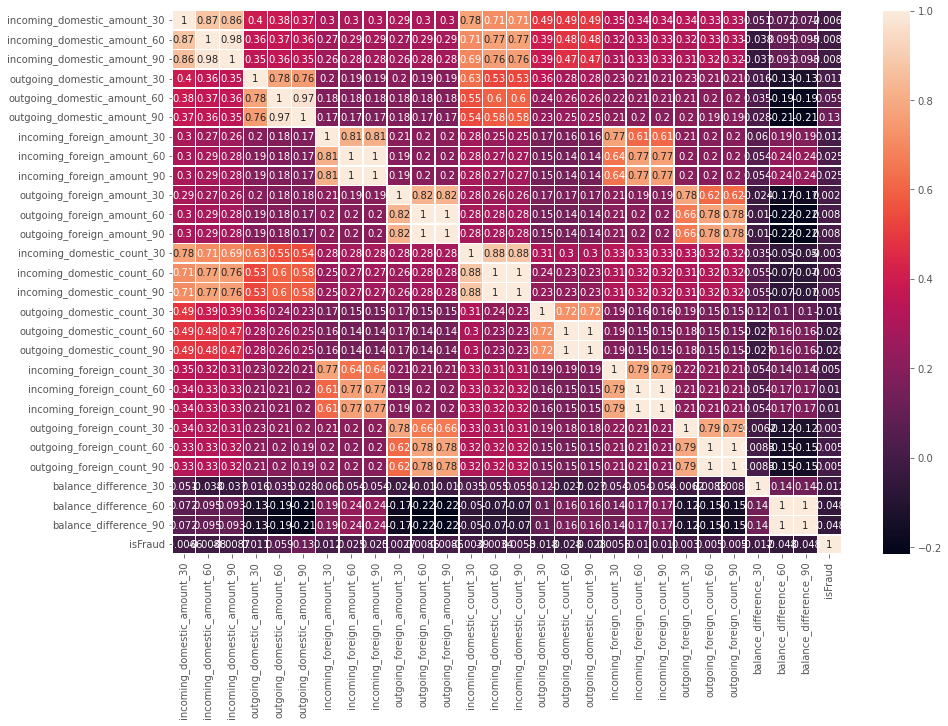

In [ ]:
#the heat map showing the correlation among different feature variables

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
p1 = sns.heatmap(df_4.corr(),annot=True,linewidths=.5, ax=ax)

The above heatmap gives us a quick overview of the secondary dataset and the correlational relationships among different feature variables.

There are several feature variables catching my attention. In particular, 'incoming_domestic_amount_30', 'incoming_domestic_amount_60' 'incoming_domestic_amount_90', 'incoming_foreign_amount_30' 'incoming_foreign_amount_60', 'incoming_foreign_amount_90','outgoing_foreign_amount_30', 'outgoing_foreign_amount_60','outgoing_foreign_amount_90', 'incoming_domestic_count_30', 'incoming_domestic_count_60', 'incoming_domestic_count_90' are strongly correlated with each other that there might be issues of multicollinearity, suggesting that these feature variables might give highly similar information.

In order to lessen the severity of multicollinearity, further efforts of feature engineering are required to extract useful feature variables to improve the quality of machine and deep learning process. 

# Splitting the dataset into feature variables (X) and target variable (y)

In [ ]:
#setting x and y variables
X = df_4.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,14,15,16,17,18]].values
y = df_4.iloc[:, [-1]].values 
#y should be in 1 column or you have to combine the 2 columns in 1!!!!!!
# e.g. scam, not scam but flagged, not flagged at all
# 3 classes

# Class imbalance in the dataset

In [ ]:
#class imbalance in the data
pd.DataFrame(y).value_counts(normalize=True)

#https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
#https://stackoverflow.com/questions/10741346/frequency-counts-for-unique-values-in-a-numpy-array

0    0.999255
1    0.000745
dtype: float64

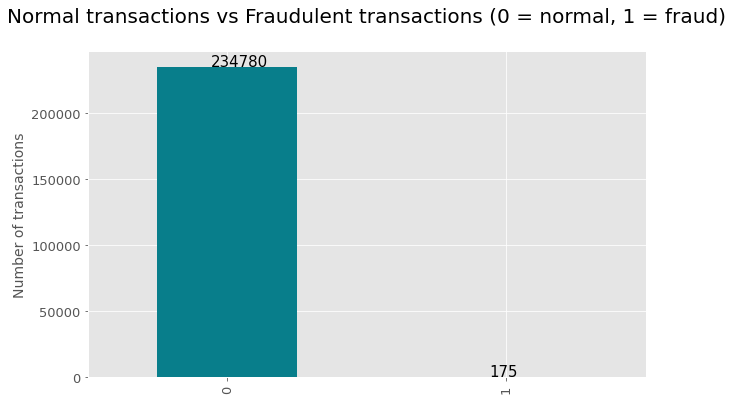

In [ ]:
ax = df_4['isFraud'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Normal transactions vs Fraudulent transactions (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

From the bar chart above, it is found that the target label is heavily imbalance since compared with 234789 counts of non-fraudulent cases, there are only 166 counts of fraudulent transactions, all of which are insufficient for machine learning and deep learning to learn when fraudulent transactions happen.

# Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_sc = sc.fit_transform(X)
# X_test = sc.transform(X_test)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Feature engineering: Principal component analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_sc_pca = pca.fit_transform(X_sc)
# X_test = pca.transform(X_test)


# pca = PCA()
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[4.01767338e-01 1.51469591e-01 1.26870364e-01 1.23563525e-01
 8.76406596e-02 2.86500329e-02 2.57234879e-02 1.58705667e-02
 1.44767441e-02 1.21892299e-02 8.90952270e-03 1.85769904e-03
 1.01123933e-03 2.91673767e-33 1.40276011e-33 3.91882925e-34]


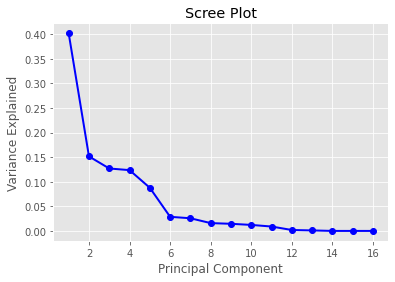

In [ ]:
#Feature engineering: PCA analysis and create a Scree Plot
#define PCA model to use
pca = PCA(n_components=16)

#fit PCA model to data
pca_fit = pca.fit(X_sc)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()



The first 5 PCA transformation would be implemented on X_train since 
the first 5 principal components have already accounted for over 90% of explained variance, as shown in the scree plot above.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_PCA = pca.fit_transform(X_sc)
# X_test_PCA = pca.transform(X_test)

In [ ]:
#split the data into 70%/ 30% training and testing set, set random_state = 101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 101)

# Resampling of the imbalanced dataset:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2,average='weighted')

In [ ]:
# # define the SMOTEENN pipeline

steps = [('over',SMOTEENN(random_state = 2)), ('model', LogisticRegression())]
pipeline = Pipeline(steps=steps)
# # evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
print('Fbeta_score:', np.mean(scores))  #ROC AUC is for regression 

Fbeta_score: 0.7298539791336627


In [ ]:
# # define the SMOTETomek pipeline

from imblearn.combine import SMOTETomek
steps = [('over',SMOTETomek(random_state = 2)), ('model', LogisticRegression())] 
pipeline = Pipeline(steps=steps)
# # evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
print('Fbeta_score:', np.mean(scores))  #ROC AUC is for regression 

Fbeta_score: 0.7296392554495793


In [ ]:
# define the SMOTE pipeline
from imblearn.over_sampling import SMOTE

steps = [('over',SMOTE(random_state = 2)), ('model', LogisticRegression())] 
pipeline = Pipeline(steps=steps)
# # evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
print('Fbeta_score:', np.mean(scores))  #ROC AUC is for regression 

Fbeta_score: 0.7296631220804024


In [ ]:
## define the BorderlineSMOTE pipeline
from imblearn.over_sampling import BorderlineSMOTE 

steps = [('over',BorderlineSMOTE(random_state = 2)), ('model', LogisticRegression())] 
pipeline = Pipeline(steps=steps)
# # evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)
print('Fbeta_score:', np.mean(scores))  #ROC AUC is for regression 

Fbeta_score: 0.8151257561050274


Resampling with BorderlineSMOTE

In [ ]:
bsm=BorderlineSMOTE(random_state=2)
X_res,y_res=bsm.fit_resample(X_train, y_train)

In [ ]:
#class imbalance in the data
pd.DataFrame(y_res).value_counts(normalize=True)

0    0.5
1    0.5
dtype: float64

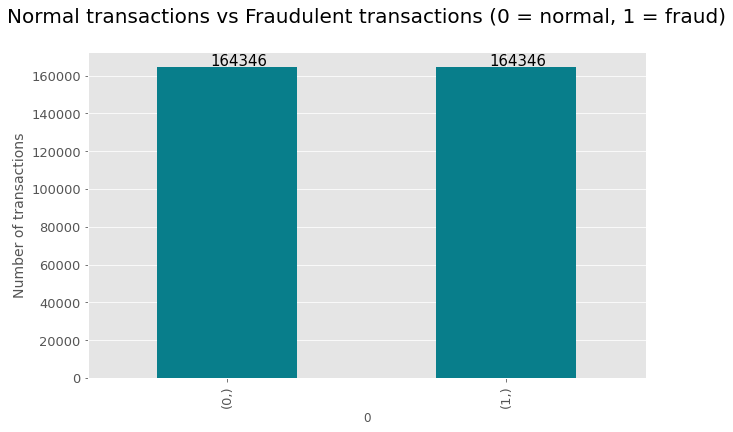

In [ ]:
y_res_pd=pd.DataFrame(y_res)
ax = y_res_pd.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Normal transactions vs Fraudulent transactions (0 = normal, 1 = fraud)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

From the bar chart above, it is found that the after the statistical resampling using BorderlineSMOTE, the target label is now balance, with the fraudulent and non-fraudulent transactions both accounting for 164353 counts respectively. As a consequece, the data sample would pose no significant issues for machine and deep learning. 




# Machine Learning models

Several classification models are to be created to train and test the data of the secondary dataset.

Fbeta score, as the weighted harmonic mean of precision and recall ,is used as one of the metrics since it favors recall, with beta > 1. In fraud detection, the opportunity cost of miss-identifying fraudulent transactions out of the total relevant instances (true fraud and false non-fraud) is often higher than that of miss-identifying fraudulent transactions out of the total instances the model retrieved (true fraud and false fraud).

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import fbeta_score
from sklearn import metrics

!pip install imbalanced-ensemble

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 33.4 MB/s 
     |████████████████████████████████| 9.4 MB 61.0 MB/s 
     |████████████████████████████████| 965 kB 61.3 MB/s 
     |████████████████████████████████| 295 kB 76.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


***RUSBoost Classifier***

The RUSBoost Classifier is to be used as the first machine learning model for classifying fraud and non-fraud transactions.

In [ ]:
from imbalanced_ensemble.ensemble import RUSBoostClassifier

RUS=RUSBoostClassifier()
RUS.fit(X_res,y_res)

RUSBoostClassifier()

In [ ]:
RUS.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'early_termination': False,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None,
 'replacement': True}

In [ ]:
RUS_ypred = RUS.predict(X_test)

In [ ]:
#The F2-measure is the F measure with the beta value=2, which doubles the significance of recall (minimization of false negatives)

def evalmetrics(ytest, rf_estimator_ypred):
    f2 = fbeta_score(ytest, rf_estimator_ypred ,average='weighted', beta=2) * 100 #beta=2 not 0.5!!!!!!!!!!
    print(classification_report(ytest, rf_estimator_ypred))
    print('\n', 'F-beta score = {:0.2f}%.'.format(f2))
    ConfusionMatrixDisplay.from_predictions(ytest, rf_estimator_ypred )
    return 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70436
           1       0.01      0.25      0.02        51

    accuracy                           0.98     70487
   macro avg       0.50      0.62      0.50     70487
weighted avg       1.00      0.98      0.99     70487


 F-beta score = 98.16%.


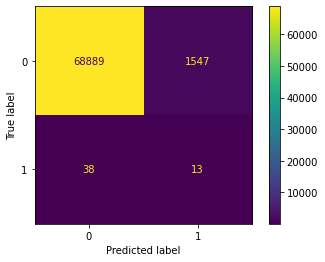

In [ ]:
# Evaulating the performance of the RUSBoost model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, RUS_ypred)

In [ ]:
#cross-validation of the RUSBoost model 
score_RUS=cross_val_score(RUS, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_RUS)
print("Avg :",np.average(score_RUS))

[0.9867803  0.98786041 0.98730608 0.98862659 0.98810138 0.98856063
 0.98856127 0.98740452 0.98929432 0.989172  ]
Avg : 0.9881667493039276


The use of an ROC AUC curve to evaluate the performance of the model on the the holdout set (X_test, y_test)

-Using predict_proba(X_test)[:,1] on the holdout set shows the estimated probability of a sample being in class 1 (fraud)

-By showing such an estimated probability in the Area Under the Curve (AUC), it is the probability an uniformly drawn random positive to be ranked higher than that of an uniformly drawn random negative by the model

In [ ]:
RUSy_pred_auc = RUS.predict_proba(X_test)[:,1]
RUSfp_r, RUStp_r, RUSt = metrics.roc_curve(y_test, RUSy_pred_auc)

Threshold moving: Selecting the optimal threshold value of the AUC score

In [ ]:
RUSt_opt_idx = np.argmax(RUStp_r - RUSfp_r)
RUSt_opt = RUSt[RUSt_opt_idx]
print("Threshold value is: %.2f" % RUSt_opt)

Threshold value is: 0.45


Using the optimal threshold value to get the AUC score:

-it is a standard technique to use threshold moving to improve the predictions by finding an optimal interpretation of the classifer-produced probabilities

-In fraud detection, the opportunity cost of misclassifying a frauduluent transaction is often higher than that of misclassifying a legitimate transaction

-In this context, it is more viable to use threshold moving to offset the threshold to minimize the false negatives at the expense of false positives

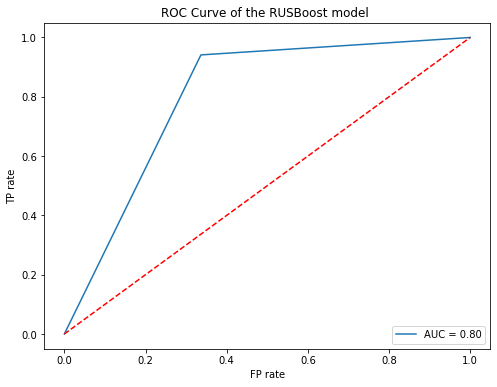

In [ ]:
RUSy_pred_auc_int = (RUSy_pred_auc > RUSt_opt).astype(int)
RUSfp_r_int, RUStp_r_int, RUSt_int = metrics.roc_curve(y_test, RUSy_pred_auc_int)
RUSauc = metrics.auc(RUSfp_r_int, RUStp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(RUSfp_r_int, RUStp_r_int, label="AUC = %.2f" % RUSauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the RUSBoost model ")
plt.show()

***SMOTEBoost Classifier***

In [ ]:
from imbalanced_ensemble.ensemble import SMOTEBoostClassifier

SMB=SMOTEBoostClassifier()
SMB.fit(X_res,y_res)

SMOTEBoostClassifier()

In [ ]:
SMB.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'early_termination': False,
 'k_neighbors': 5,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
SMB_ypred = SMB.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70436
           1       0.01      0.25      0.02        51

    accuracy                           0.98     70487
   macro avg       0.50      0.62      0.50     70487
weighted avg       1.00      0.98      0.99     70487


 F-beta score = 98.17%.


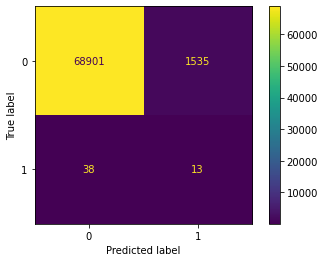

In [ ]:
# Evaulating the performance of the SMOTEBoost model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, SMB_ypred)

In [ ]:
#cross-validation of the SMOTEBoost model 
score_SMB=cross_val_score(SMB, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_SMB)
print("Avg :",np.average(score_SMB))

[0.98671921 0.98813922 0.9879498  0.98904968 0.98785659 0.98819785
 0.9883152  0.98978324 0.9893564  0.98917168]
Avg : 0.9884538864092871


In [ ]:
SMBy_pred_auc = SMB.predict_proba(X_test)[:,1]
SMBfp_r, SMBtp_r, SMBt = metrics.roc_curve(y_test, SMBy_pred_auc)

In [ ]:
SMBt_opt_idx = np.argmax(SMBtp_r - SMBfp_r)
SMBt_opt = SMBt[SMBt_opt_idx]
print("Threshold value is: %.2f" % SMBt_opt)

Threshold value is: 0.44


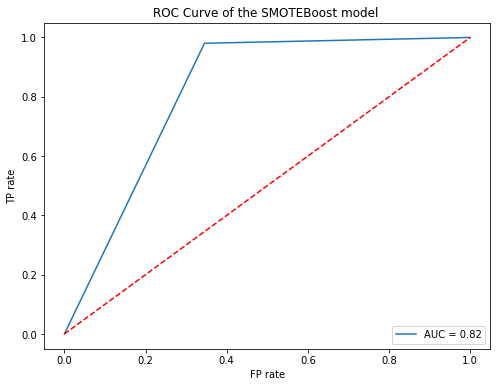

In [ ]:
SMBy_pred_auc_int = (SMBy_pred_auc > SMBt_opt).astype(int)
SMBfp_r_int, SMBtp_r_int, SMBt_int = metrics.roc_curve(y_test, SMBy_pred_auc_int)
SMBauc = metrics.auc(SMBfp_r_int, SMBtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(SMBfp_r_int, SMBtp_r_int, label="AUC = %.2f" % SMBauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the SMOTEBoost model ")
plt.show()

***XGBoost Classifier***

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
# # define the model
XBG = XGBClassifier()
#XBG = XGBClassifier(scale_pos_weight=1) #for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100. 
# # fit the model on the whole dataset
XBG.fit(X_res,y_res)

XGBClassifier()

In [ ]:
XBG.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
XBG_ypred = XBG.predict(X_test)

In [ ]:
#The F2-measure is the F measure with the beta value=2, which doubles the significance of recall (minimization of false negatives)

def evalmetrics(ytest, rf_estimator_ypred):
    f2 = fbeta_score(ytest, rf_estimator_ypred ,average='weighted', beta=2) * 100 #beta=2 not 0.5!!!!!!!!!!
    print(classification_report(ytest, rf_estimator_ypred))
    print('\n', 'F-beta score = {:0.2f}%.'.format(f2))
    ConfusionMatrixDisplay.from_predictions(ytest, rf_estimator_ypred )
    return 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70436
           1       0.01      0.25      0.03        51

    accuracy                           0.99     70487
   macro avg       0.51      0.62      0.51     70487
weighted avg       1.00      0.99      0.99     70487


 F-beta score = 98.82%.


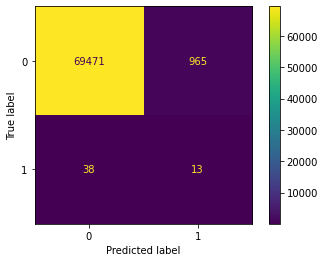

In [ ]:
# Evaulating the performance of the XGBoost model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, XBG_ypred)

In [ ]:
#cross-validation of the XGBoost model 
score_XBG=cross_val_score(XBG, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_XBG)
print("Avg :",np.average(score_XBG))

[0.98980132 0.99204466 0.99170895 0.99293009 0.99198358 0.99247238
 0.99247215 0.99271639 0.99323512 0.99286903]
Avg : 0.9922233681257555


In [ ]:
Xy_pred_auc = XBG.predict_proba(X_test)[:,1]
Xfp_r, Xtp_r, Xt = metrics.roc_curve(y_test, Xy_pred_auc)

In [ ]:
Xt_opt_idx = np.argmax(Xtp_r - Xfp_r)
Xt_opt = Xt[Xt_opt_idx]
print("Threshold value is: %.2f" % Xt_opt)

Threshold value is: 0.00


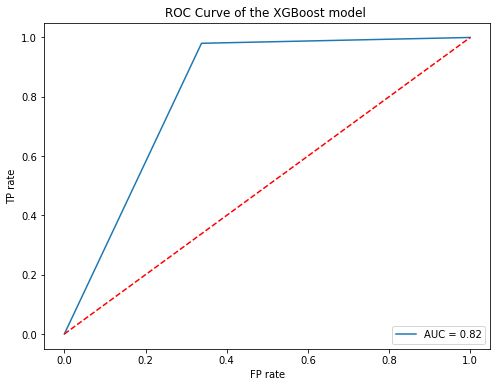

In [ ]:
y_pred_auc_int = (Xy_pred_auc > Xt_opt).astype(int)
Xfp_r_int, Xtp_r_int, Xt_int = metrics.roc_curve(y_test, y_pred_auc_int)
Xauc = metrics.auc(Xfp_r_int, Xtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(Xfp_r_int, Xtp_r_int, label="AUC = %.2f" % Xauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the XGBoost model ")
plt.show()

***AdaBoost Classifier***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ADA = AdaBoostClassifier()
# # fit the model on the whole dataset
ADA.fit(X_res,y_res)

AdaBoostClassifier()

In [ ]:
ADA.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
ADA_ypred =ADA.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70436
           1       0.01      0.25      0.02        51

    accuracy                           0.98     70487
   macro avg       0.50      0.62      0.50     70487
weighted avg       1.00      0.98      0.99     70487


 F-beta score = 98.17%.


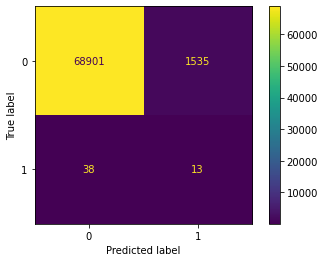

In [ ]:
# Evaulating the performance of the AdaBoost model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, ADA_ypred)

In [ ]:
#cross-validation of the AdaBoost model 
score_ADA=cross_val_score(ADA, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_ADA)
print("Avg :",np.average(score_ADA))

[0.98671921 0.98813922 0.9879498  0.98904968 0.98785659 0.98819785
 0.9883152  0.98978324 0.9893564  0.98917168]
Avg : 0.9884538864092871


In [ ]:
ADAy_pred_auc = ADA.predict_proba(X_test)[:,1]
ADAfp_r, ADAtp_r, ADAt = metrics.roc_curve(y_test, ADAy_pred_auc)

In [ ]:
ADAt_opt_idx = np.argmax(ADAtp_r - ADAfp_r)
ADAt_opt = ADAt[ADAt_opt_idx]
print("Threshold value is: %.2f" % ADAt_opt)

Threshold value is: 0.44


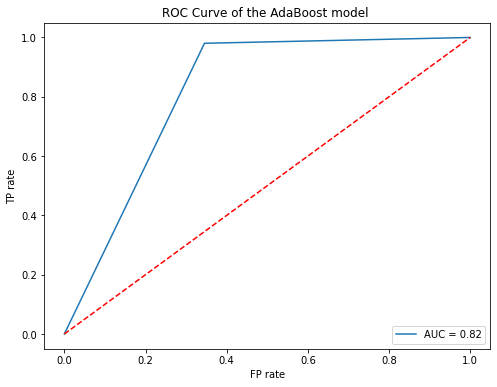

In [ ]:
ADAy_pred_auc_int = (ADAy_pred_auc > ADAt_opt).astype(int)
ADAfp_r_int, ADAtp_r_int, ADAt_int = metrics.roc_curve(y_test, ADAy_pred_auc_int)
ADAauc = metrics.auc(ADAfp_r_int, ADAtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(ADAfp_r_int, ADAtp_r_int, label="AUC = %.2f" % ADAauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the AdaBoost model ")
plt.show()

***Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_estimator = RandomForestClassifier()
# fit the model on the whole dataset
rf_estimator.fit(X_res,y_res)



RandomForestClassifier()

In [ ]:
rf_estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_estimator_ypred = rf_estimator.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70434
           1       0.03      0.25      0.06        53

    accuracy                           0.99     70487
   macro avg       0.52      0.62      0.53     70487
weighted avg       1.00      0.99      1.00     70487


 F-beta score = 99.47%.


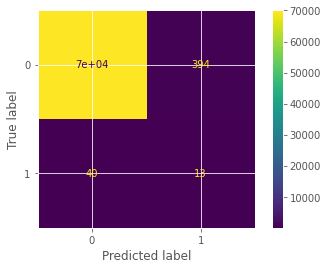

In [ ]:
# Evaulating the performance of the Random Forest model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, rf_estimator_ypred)

In [ ]:
#cross-validation of the Random Forest model 
score_rf_estimator=cross_val_score(rf_estimator, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_rf_estimator)
print("Avg :",np.average(score_rf_estimator))

[0.99351986 0.99580121 0.9944921  0.99543632 0.99577088 0.99570987
 0.99549653 0.99610553 0.99540551 0.9952839 ]
Avg : 0.9953021709960943


In [ ]:
Ry_pred_auc = rf_estimator.predict_proba(X_test)[:,1]
Rfp_r, Rtp_r, Rt = metrics.roc_curve(y_test, Ry_pred_auc)

In [ ]:
Rt_opt_idx = np.argmax(Rtp_r - Rfp_r)
Rt_opt = Rt[Rt_opt_idx]
print("Threshold value is: %.2f" % Rt_opt)

Threshold value is: 0.01


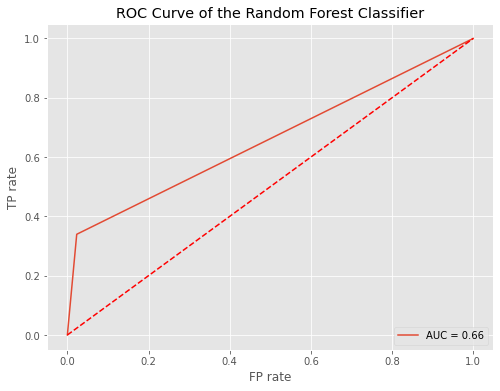

In [ ]:
Ry_pred_auc_int = (Ry_pred_auc > Rt_opt).astype(int)
Rfp_r_int, Rtp_r_int, Rt_int = metrics.roc_curve(y_test, Ry_pred_auc_int)
Rauc = metrics.auc(Rfp_r_int, Rtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(Rfp_r_int, Rtp_r_int, label="AUC = %.2f" % Rauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the Random Forest Classifier")
plt.show()

***The Linear Support Vector Classifier (SVC)***

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

LSVC_estimator = LinearSVC()
LSVC_estimator=CalibratedClassifierCV(LSVC_estimator)
# fit the model on the whole dataset
LSVC_estimator.fit(X_res,y_res)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC())

In [ ]:
LSVC_estimator.get_params()

{'base_estimator': 'deprecated',
 'cv': None,
 'ensemble': True,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': True,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__loss': 'squared_hinge',
 'estimator__max_iter': 1000,
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator': LinearSVC(),
 'method': 'sigmoid',
 'n_jobs': None}

In [ ]:
LSVC_estimator_ypred = LSVC_estimator.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     70436
           1       0.00      0.31      0.01        51

    accuracy                           0.94     70487
   macro avg       0.50      0.63      0.49     70487
weighted avg       1.00      0.94      0.97     70487


 F-beta score = 95.40%.


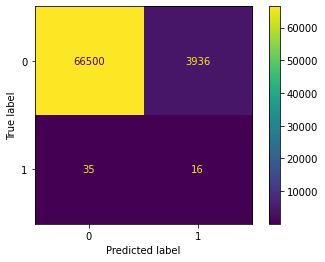

In [ ]:
# Evaulating the performance of the Linear Support Vector Classifier 
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, LSVC_estimator_ypred)

In [ ]:
#cross-validation of the Linear Support Vector Classifier 
score_LSVC_estimator=cross_val_score(LSVC_estimator, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_LSVC_estimator)
print("Avg :",np.average(score_LSVC_estimator))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

[0.93530207 0.93844135 0.93878159 0.93813417 0.93522193 0.93896929
 0.93774959 0.93512721 0.93700124 0.9362408 ]
Avg : 0.9370969236520809


In [ ]:
Ly_pred_auc = LSVC_estimator.predict_proba(X_test)[:,1]
Lfp_r, Ltp_r, Lt = metrics.roc_curve(y_test, Ly_pred_auc)

In [ ]:
Lt_opt_idx = np.argmax(Ltp_r - Lfp_r)
Lt_opt = Lt[Lt_opt_idx]
print("Threshold value is: %.2f" % Lt_opt)

Threshold value is: 0.01


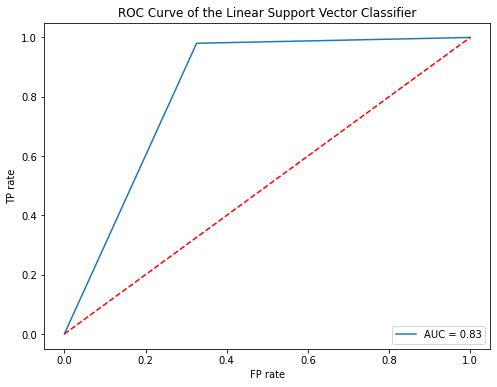

In [ ]:
Ly_pred_auc_int = (Ly_pred_auc > Lt_opt).astype(int)
Lfp_r_int, Ltp_r_int, Lt_int = metrics.roc_curve(y_test, Ly_pred_auc_int)
Lauc = metrics.auc(Lfp_r_int, Ltp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(Lfp_r_int, Ltp_r_int, label="AUC = %.2f" % Lauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the Linear Support Vector Classifier")
plt.show()

***Naive Bayes Classifier (GaussianNB)***

In [ ]:
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()
GaussianNB.fit(X_res,y_res)

GaussianNB()

In [ ]:
GaussianNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
NB_ypred = GaussianNB.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     70436
           1       0.00      0.20      0.01        51

    accuracy                           0.96     70487
   macro avg       0.50      0.58      0.49     70487
weighted avg       1.00      0.96      0.98     70487


 F-beta score = 96.77%.


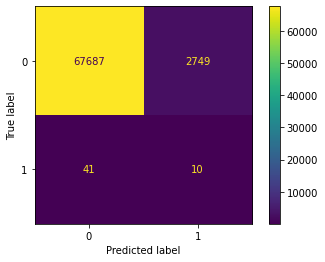

In [ ]:
# Evaulating the performance of the naive bayes model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, NB_ypred)

In [ ]:
#cross-validation of naive bayes model
score_GaussianNB=cross_val_score(GaussianNB, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_GaussianNB)
print("Avg :",np.average(score_GaussianNB))

[0.89376423 0.89382799 0.89752089 0.89578465 0.89732722 0.89426296
 0.89499185 0.89668772 0.8974092  0.89354796]
Avg : 0.8955124669068752


In [ ]:
NBy_pred_auc = GaussianNB.predict_proba(X_test)[:,1]
NBfp_r, NBtp_r, NBt = metrics.roc_curve(y_test, NBy_pred_auc)

In [ ]:
NBt_opt_idx = np.argmax(NBtp_r - NBfp_r)
NBt_opt = NBt[NBt_opt_idx]
print("Threshold value is: %.2f" % NBt_opt)

Threshold value is: 0.00


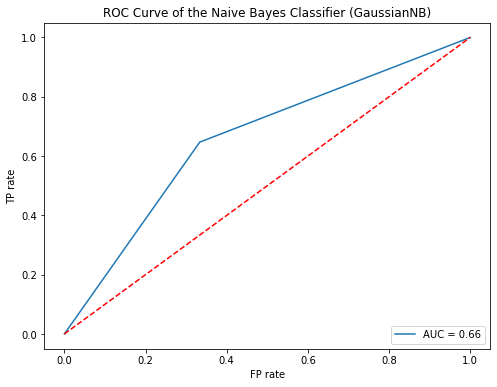

In [ ]:
NBy_pred_auc_int = (NBy_pred_auc > NBt_opt).astype(int)
NBfp_r_int, NBtp_r_int, NBt_int = metrics.roc_curve(y_test, NBy_pred_auc_int)
NBauc = metrics.auc(NBfp_r_int, NBtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(NBfp_r_int, NBtp_r_int, label="AUC = %.2f" % NBauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the Naive Bayes Classifier (GaussianNB)")
plt.show()

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_res,y_res)

LogisticRegression()

In [ ]:
LR_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
LR_ypred = LR_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     70436
           1       0.00      0.33      0.01        51

    accuracy                           0.94     70487
   macro avg       0.50      0.64      0.49     70487
weighted avg       1.00      0.94      0.97     70487


 F-beta score = 95.06%.


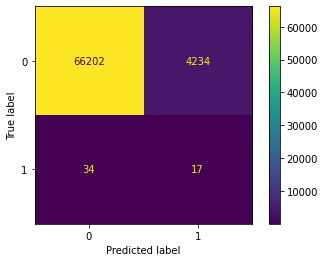

In [ ]:
# Evaulating the performance of the Logistic Regression model
# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance

evalmetrics(y_test, LR_ypred)

In [ ]:
#cross-validation of logistic regression
score_LR_model=cross_val_score(LR_model, X_res, y_res,cv=10, scoring=ftwo_scorer)
print(score_LR_model)
print("Avg :",np.average(score_LR_model))

[0.93519305 0.938329   0.93781669 0.93793566 0.93504738 0.93879054
 0.93726762 0.93437457 0.93668369 0.93552683]
Avg : 0.9366965027315258


In [ ]:
LRy_pred_auc = LR_model.predict_proba(X_test)[:,1]
LRfp_r, LRtp_r, LRt = metrics.roc_curve(y_test, LRy_pred_auc)

In [ ]:
LRt_opt_idx = np.argmax(LRtp_r - LRfp_r)
LRt_opt = LRt[LRt_opt_idx]
print("Threshold value is: %.2f" % LRt_opt)

Threshold value is: 0.00


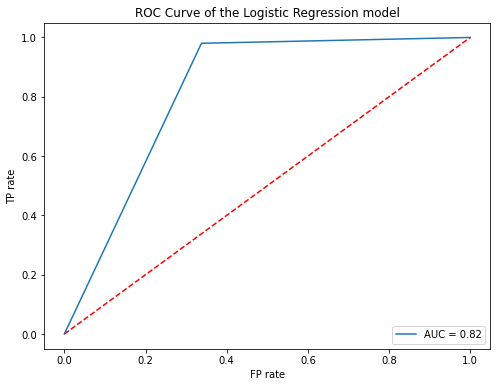

In [ ]:
LRy_pred_auc_int = (LRy_pred_auc > LRt_opt).astype(int)
LRfp_r_int, LRtp_r_int, LRt_int = metrics.roc_curve(y_test, LRy_pred_auc_int)
LRauc = metrics.auc(LRfp_r_int, LRtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(LRfp_r_int, LRtp_r_int, label="AUC = %.2f" % LRauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the Logistic Regression model")
plt.show()

# Results from Machine Learning and their comparison

The above results suggest that most of the machine learning models can distinguish and classify transactions as fraud and non-fraud, with high levels of 10-fold cross-validated fbeta score ranging from 0.896 to 0.995. Among them, the Random Forest Classifier has the highest fbeta score at 0.995, followed by the XGBoost Classifier at 0.992, whilst the Naive Bayes Classifier is found to have a marginally poorer fbeta score at 0.896.

However, given that it is an imbalanced dataset, it is also crucial to consider the Receiver Operator Characteristic (ROC) score to understand the diagnostic ability of the binary classifiers above by examining the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
Among all the classifiers using the boosting technique (XGBoost, RUSBoost, SMOTEBoost, Adaboost), in addition to the Linear Support Vector Classifier and the Logistic Regression, they share a ROC score of over 80%, while for the Random Forest Classifier, it is surprising to discover its ROC score  being merely 66%.

By weighting the fbeta score against the ROC score, it is found that the XGBoost Classifier being the best performing method, followed by the SMOTEBoost Classifier and the AdaBoost Classifier, which share the same fbeta and ROC scores, whereas the worst performing method would be the Naive Bayes Classifier (GaussianNB).




---


Notwithstanding the high level of fbeta and ROC scores of the machine learning classification models above, the use of neural networks might also be worthwhile to be examined. Due to the high computational costs and time, an artifical neural network (ANN) is to be adopted , in conjunction with other high-performing machine learning classifiers (all of which fbeta score and ROC score amounting to over 90% and 80% respectively) such as RUSBoost , Adaboost, SMOTEBoost, XGBoost ,for conducting ensemble learning. 


# Ensemble Learning
Combining predictions from different machine learning and deep learning models



1.   Sequential (Artificial) Neural Network
2.   RUSBoost Classifier 
3.   Adaboost Classifier
4.   SMOTEBoost Classifier
5.   XGBoost Classifier




In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.model_selection import RandomizedSearchCV
#!pip install mlxtend  
!pip install git+git://github.com/rasbt/mlxtend.git
from mlxtend.classifier import StackingCVClassifier
from mlxtend.classifier import EnsembleVoteClassifier

!pip install -U keras-tuner
!pip install bayesian-optimization
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
import kerastuner as kt
from keras.layers import GaussianNoise

from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import BatchNormalization

from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-omj235sv
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-omj235sv
  fatal: unable to connect to github.com:
  github.com[0: 20.205.243.166]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-omj235sv Check the logs for full command output.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-115-13f0628d9fe8>:19: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
# Importing the Keras libraries and packages
from tensorflow import keras
from keras.models import Sequential # "Sequential" is your classifier (input layer, then hidden layer and then output layer)
from keras.layers import Dense, Dropout #cuz all those are dense layers

from tensorflow.python.keras.layers import Layer, InputSpec
from keras.utils.layer_utils import get_source_inputs
import tensorflow.python.keras.engine
# from tensorflow.keras import Sequential
import pickle

import tensorflow as tf
import os

from keras import regularizers

In [ ]:
#The runtime must be restarted to use version 2.11 of Keras and Tensorflow
!pip install --ignore-installed --upgrade tensorflow==2.11
!pip install --ignore-installed --upgrade keras==2.11
!pip install --upgrade tensorflow
!pip install --upgrade keras
# !pip install tensorflow=2.11.0
# !pip install Keras=2.11.0
from tensorflow import keras
!pip install scikeras[tensorflow]
!pip install scikeras
import tensorflow as tf 
# import tensorflow_addons as tfa
!pip3 install tfa-nightly
from keras import backend as K
from scikeras.wrappers import KerasClassifier


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + K.epsilon())

def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

def f_beta(y_true, y_pred):
    beta = 1
    precision_value = precision(y_true, y_pred)
    recall_value = recall(y_true, y_pred)
    numer = (1 + beta ** 2) * (precision_value * recall_value)
    denom = ((beta ** 2) * precision_value) + recall_value + K.epsilon()
    return numer / denom


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.11.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached wrapt-1.14.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (81 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached numpy-1.24.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached packaging-22.0-py3-none-any.whl (42 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.7.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (4.5 MB)
  Using cached flatbuffers-22.12.6-py2.py3-none-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.3.6 requires packaging<22.0.0dev,>=14.3, but you have packaging 22.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tf.__version__

'2.11.0'

In [ ]:
keras.__version__

'2.11.0'

In [ ]:
input_dim = X_res.shape[1]
X_res.shape

(328706, 5)

***Artificial Neural Network***

In [ ]:
def get_model():
    model= Sequential([Dense(units = 65.75,kernel_initializer = 'uniform', activation = 'LeakyReLU', input_dim = input_dim),
                       Dense(units = 87.75, kernel_initializer = 'uniform', activation = 'LeakyReLU'),
                       Dense(units = 87.75,kernel_initializer='uniform',activation='LeakyReLU'),
                       Dense(units = 87.75, kernel_initializer = 'uniform', activation = 'LeakyReLU'),
                       Dense(units = 87.75, kernel_initializer = 'uniform', activation = 'LeakyReLU'),
                       Dense(units = 87.75,kernel_initializer='uniform',activation='LeakyReLU'),
                       Dense(units = 71.75, kernel_initializer = 'uniform', activation = 'LeakyReLU'),
                       Dropout(0.25),
                       Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')])
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [f_beta])
    return model

In [ ]:
m2 = KerasClassifier(model=get_model,batch_size=50)


In [ ]:
m2._estimator_type = "classifier"

***Ensemble Voting Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier 

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from keras.losses import binary_crossentropy

!pip install imbalanced-ensemble
from imbalanced_ensemble.ensemble import RUSBoostClassifier
from imbalanced_ensemble.ensemble import SMOTEBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier

from mlxtend.classifier import EnsembleVoteClassifier


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1410/1410 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70436
           1       0.01      0.20      0.01        51

    accuracy                           0.98     70487
   macro avg       0.50      0.59      0.50     70487
weighted avg       1.00      0.98      0.99     70487


 F-beta score = 98.37%.
658/658 [==============================] - 1s 2ms/step
[0.89859723 0.98549473 0.93989275 0.93672472 0.9237586  0.98249444
 0.97686397 0.90652062 0.86629104 0.92926435]
Avg : 0.9345902451822999 Neural network
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70436
           1       0.01      0.25      0.02        51

    accuracy                           0.98     70487
   macro avg       0.50      0.62      0.50     70487
weighted avg

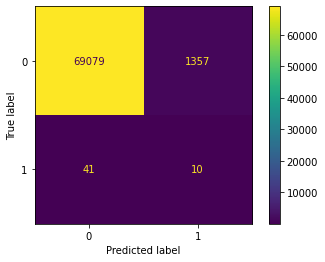

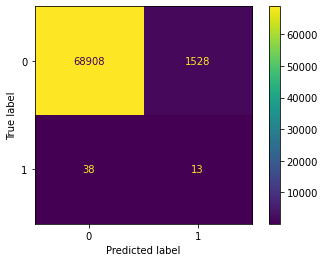

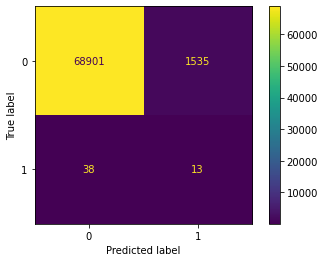

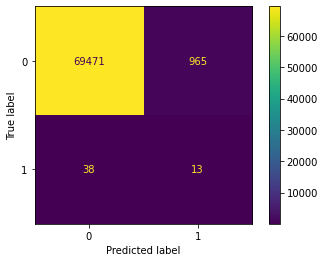

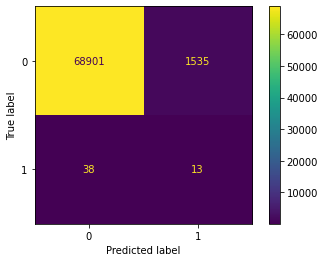

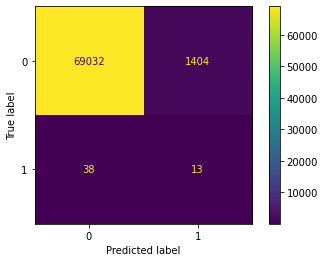

In [ ]:
from sklearn.metrics import fbeta_score, make_score
!pip install scikeras
from scikeras.wrappers import KerasClassifier
ftwo_scorer = make_scorer(fbeta_score, beta=2,average='weighted')
from sklearn.calibration import CalibratedClassifierCV

LSVC_estimator = LinearSVC()
LSVC=CalibratedClassifierCV(LSVC_estimator)
log_reg= LogisticRegression()
# RUS=RUSBoostClassifier()
SMB=SMOTEBoostClassifier()
XBG = XGBClassifier()
# ADA = AdaBoostClassifier()

# estimators = []
eclf = EnsembleVoteClassifier(clfs=[m2, LSVC, SMB,XBG, log_reg], weights=[1,3,2,3,2],voting ='soft')
labels = ['Neural network','LinearSVC', 'SMOTEBoost', 'XGBoost','Logistic_Reg','Ensemble']
for clf, label in zip([m2, LSVC, SMB,XBG,log_reg, eclf], labels):
  clf.fit(X_res,y_res)
  y_pred = clf.predict(X_test)
  f2=fbeta_score(y_test, y_pred,average="weighted", beta=2)* 100
  print(classification_report(y_test, y_pred))
  print('\n', 'F-beta score = {:0.2f}%.'.format(f2))
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred )
  scores = cross_val_score(clf, X_res, y_res, cv=10, scoring=ftwo_scorer,error_score='raise')
  print(scores)
  print("Avg :",np.average(scores),label)




As shown above in the case of the Ensemble Voting Classifier, the Artificial Neural Network, Linear Support Vector Classifier, SMOTEBoost, XGBoost, Logistic Regression are subject to the following weighting ratios of 1:3:2:3:2 respectively due to the following reasons.

1. For neural networks, they are always negatively affected by data imbalance (Bansal et al,2021). Despite the presence of rebalancing techniques, the problem of data imbalance cannot be effectively solved due to the "rapid memorization of minority class data" (Bansal et al,2021). Therefore, it is better off assigning the weighting ratio of the neural network to be 1.
2. In the case of the Linear Support Vector Classifier, it is subject to a weighting ratio of 3 since it has the highest ROC score at 0.83 and the third highest fbeta score at 0.9367.
3. In the case of the SMOTEBoost Classifier, it is subject to a weighting ratio of 2 since it has the second highest ROC and fbeta score at 0.82 and 0.988 respectively.
4. In the case of the XGBoost Classifier, it is subject to a weighting ratio of 3 since it has the second highest ROC score at 0.82 and the highest fbeta score at 0.992.
5. In the case of Logistic Regression, it is subject to a weighting ratio of 2 since it has the second highest ROC and fourth highest fbeta score at 0.82 and 0.9367 respectively.


---





The use of an ROC AUC curve to evaluate the performance of the model on the the holdout set (X_test, y_test)

-Using predict_proba(X_test)[:,1] on the holdout set shows the estimated probability of a sample being in class 1 (fraud)

-By showing such an estimated probability in the Area Under the Curve (AUC), it is the probability an uniformly drawn random positive to be ranked higher than that of an uniformly drawn random negative by the model.

In [ ]:
STy_pred = clf.predict_proba(X_test)[:,1]
STfp_r, STtp_r, STt = metrics.roc_curve(y_test, STy_pred)


1410/1410 [==============================] - 2s 2ms/step


Threshold moving: Selecting the optimal threshold value of the AUC score

In [ ]:
STt_opt_idx = np.argmax(STtp_r - STfp_r)
STt_opt = STt[STt_opt_idx]
print("Threshold value is: %.2f" % STt_opt)

Threshold value is: 0.31


Using the optimal threshold value to get the AUC score:

-it is a standard technique to use threshold moving to improve the predictions by finding an optimal interpretation of the classifer-produced probabilities

-In fraud detection, the opportunity cost of misclassifying a frauduluent transaction is often higher than that of misclassifying a legitimate transaction

-In this context, it is more viable to use threshold moving to offset the threshold to minimize the false negatives at the expense of false positives

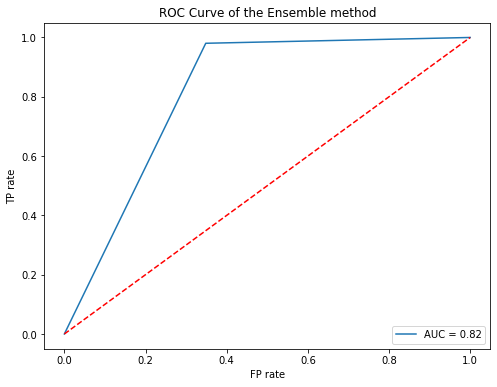

In [ ]:
STy_pred_int = (STy_pred >STt_opt).astype(int) #increase the threshold value to higher score; ideally no threshold value between 0.4 and 0.6!!!!!!!!!!!!!!!!!!!!!
STfp_r_int, STtp_r_int, STt_int = metrics.roc_curve(y_test, STy_pred_int)
STauc = metrics.auc(STfp_r_int, STtp_r_int)
plt.figure(figsize=(8, 6))
plt.plot(STfp_r_int, STtp_r_int, label="AUC = %.2f" % STauc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve of the Ensemble method")
plt.show()

# Results from the Ensemble Learning Model and its comparison 

The above results reveal that the Ensemble Learning Model is able to distinguish and classify transactions as fraud and non-fraud with a fbeta score at 0.989965 and a ROC score at 0.82. 

As a result, while the ROC score of the ensemble learning model is more or less the same as those of the majority of the machine learning classifiers, the Ensemble Learning Lodel has the second highest fbeta score ,overtaken by that of the Random Forest Model. However, although  the Random Forest Model has the highest fbeta score, the ROC score of the Random Forest Model is only 0.66. 

In light of the above reason, the Ensemble Learning Model is still deemed to be a better choice than the above machine learning classifiers.

# Reference list:
Bansal, A, et al.(2021). MetaBalance: High-Performance Neural Networks for Class-Imbalanced Data. https://arxiv.org/abs/2106.09643

Chandra, I. (2017). Money-Laundering-Detector. https://github.com/indranildchandra/Money-Laundering-Detector

